<a href="https://colab.research.google.com/github/pondbaahh/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means

### Generate Data 

In [1]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(n_samples=500,centers=3,n_features=2,random_state=6) 

### Explore data

In [4]:
X.shape #x 500 จุด มี 2 features

(500, 2)

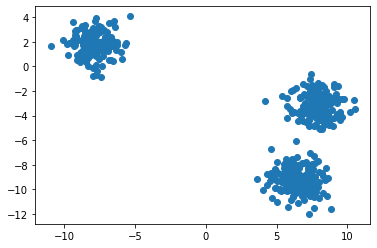

In [6]:
from matplotlib import  pyplot as plt
plt.scatter(X[:,0],X[:,1])

### Clustering

####import 

In [7]:
from sklearn.cluster import KMeans

#### Define

In [9]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [12]:
y_clust = kmeans.fit_predict(X)

In [13]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

2 clusters

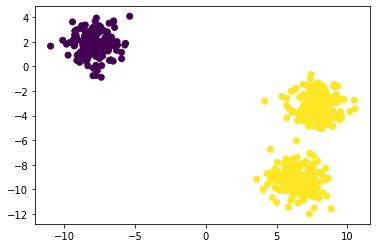

In [14]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

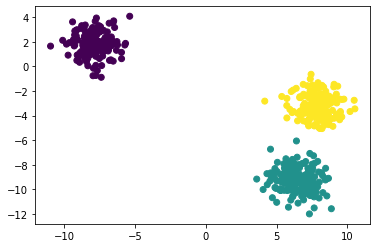

In [15]:
#Definre
kmeans = KMeans(n_clusters=3, random_state=6)
#fit_predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

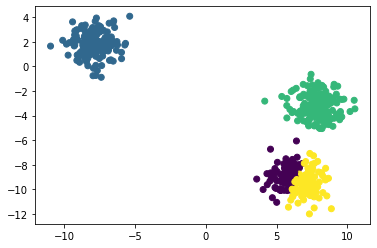

In [17]:
#Definre
kmeans = KMeans(n_clusters=4, random_state=6)
#fit_predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

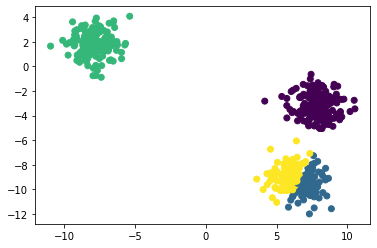

In [19]:
#Definre
kmeans = KMeans(n_clusters=4,init = 'random')
#fit_predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

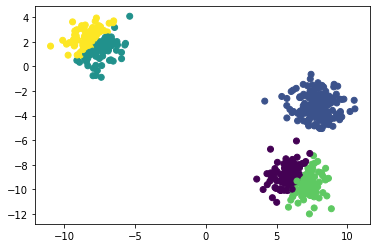

In [20]:
#Definre
kmeans = KMeans(n_clusters=5,random_state=14, init = 'random')
#fit_predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

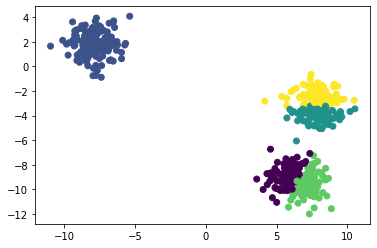

In [21]:
#Definre
kmeans = KMeans(n_clusters=5,random_state=6, init = 'random')
#fit_predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

Example Application(color quantization)

In [22]:
import cv2
import os

In [30]:
img = cv2.imread('/123338897_3530944480336791_2210561554570172469_o.jpg')

In [31]:
img.shape

(1275, 850, 3)

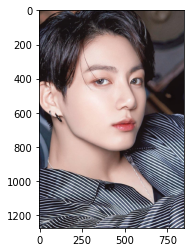

In [33]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

###นับจำนวนสี

In [34]:
import numpy as np

In [35]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape #มี 84,946 สี

(84946, 3)

###จัดกลุ่มสีให้เหลือ 16 สี

In [36]:
myquantize = KMeans(n_clusters=16, random_state=6)


แปลงข้อมูลให้อยู่ในรูป row-column

In [37]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(1083750, 3)

In [38]:
final_color = myquantize.fit_predict(img_row)


ใช้ centroid เป็นตัวแทนของสี

In [39]:
centroid = myquantize.cluster_centers_

In [40]:
centroid

array([[110.85959193, 116.43717228, 134.07330127],
       [230.20347672, 197.69559314, 189.22127597],
       [167.36088555, 126.8564816 , 119.53429259],
       [ 23.99122095,  18.87564317,  22.57002805],
       [ 54.17156804,  62.271023  ,  78.95173994],
       [232.91998511, 240.12519125, 248.2770748 ],
       [241.99852379, 217.38688648, 209.96641345],
       [195.03259369, 155.74895471, 147.0397114 ],
       [ 85.63079066,  72.03831054,  70.68114546],
       [ 36.10982377,  34.27909925,  44.84438788],
       [148.15099029, 154.98924272, 172.32368932],
       [132.54389509,  97.79669971,  92.3060381 ],
       [189.49775606, 197.43340572, 214.12562432],
       [ 63.04810589,  51.81875687,  52.65195436],
       [215.64738166, 179.19542051, 170.33443097],
       [ 84.78328389,  87.17834233, 102.41667301]])

In [42]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
      new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

In [45]:
plt.imsave('img.jpg',new_img/255)

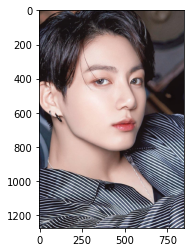

In [44]:
plt.imshow(RGB_img)

#Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

#Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation